In [4]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt

def plot_barcharts(dataset, columns):
    num_features = len(columns)
    num_rows = num_features // 2 + num_features % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5*num_rows))

    for i, ax in enumerate(axes.flatten()):
        if i < num_features:
            column_data = dataset[columns[i]]
            dataset.groupby(column_data).size().plot(kind='bar', ax=ax)
            ax.set_title(columns[i])
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

In [6]:
def cal_anova(dataset, inp_features, target_feature):
    """ Returns p-value of anova for input features

    dataset: Dataframe
    inp_features: input features for anova test
    target_feature: target feature"""
    from scipy.stats import f_oneway

    result = "Points to consider\n------------------\n\n1. Assumption(H0) is inpfeature and Target are NOT correlated\n2. We accept the Assumption(H0) only when P-Value > 0.05\n\n"
    valid_features = []
    for feature in inp_features:
        GroupedValues = dataset.groupby(feature)[target_feature].apply(list)
        Anovaresult = f_oneway(*GroupedValues)
        result+= f"p-value for {feature} = {Anovaresult[1]}\n"
        if Anovaresult[1] < 0.05:
            valid_features.append(feature)
    return result, valid_features

In [7]:
ZomatoData = pd.read_csv(r'/content/zomato.csv', encoding='latin-1')
ZomatoData.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [8]:
CountryCode = pd.read_excel(r'/content/Country-Code.xlsx')
CountryCode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [9]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
object_cols = list(ZomatoData.select_dtypes(include=['object']).columns)
object_cols

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text']

In [12]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [13]:
 #One-liner to get data type and number of unique values for each column and display as DataFrame
col_details = pd.DataFrame([(col, dtype, unique_count) for col, dtype, unique_count in zip(ZomatoData.columns, ZomatoData.dtypes, ZomatoData.nunique())],
                           columns=['Column', 'Data Type', 'Unique Values'])
col_details

,Column,Data Type,Unique Values
0,Restaurant ID,int64,9551
1,Restaurant Name,object,7446
2,Country Code,int64,15
3,City,object,141
4,Address,object,8918
5,Locality,object,1208
6,Locality Verbose,object,1265
7,Longitude,float64,8120
8,Latitude,float64,8677
9,Cuisines,object,1825


In [14]:
col_details['Col Type'] = ['Discrete Num Data', 'Qualitative Data', 'Nominal Categorical data', 'Nominal Categorical data',
                          'Qualitative Data', 'Qualitative Data', 'Qualitative Data', 'Continuous Num data',
                          'Continuous Num data', 'Qualitative Data', 'Continuous Num data', 'Nominal Categorical data',
                          'Nominal Categorical data', 'Nominal Categorical data','Nominal Categorical data',
                          'Nominal Categorical data', 'Ordinal Categorical data', 'Continuous Num data',
                          'Ordinal Categorical data', 'Ordinal Categorical data', 'Continuous Num data']

In [15]:
col_details

,Column,Data Type,Unique Values,Col Type
0,Restaurant ID,int64,9551,Discrete Num Data
1,Restaurant Name,object,7446,Qualitative Data
2,Country Code,int64,15,Nominal Categorical data
3,City,object,141,Nominal Categorical data
4,Address,object,8918,Qualitative Data
5,Locality,object,1208,Qualitative Data
6,Locality Verbose,object,1265,Qualitative Data
7,Longitude,float64,8120,Continuous Num data
8,Latitude,float64,8677,Continuous Num data
9,Cuisines,object,1825,Qualitative Data


In [16]:
Description_of_col = ['Cnt_Use, As all vals are unq',
 'Cnt_Use.Imbal Dist. More unq vals',
 'Cnt_Use.Imbal Dist.',
 'Cnt_Use.Imbal Dist.',
 'Cnt_Use.Qualitative data',
 'Cnt_Use.Qualitative data',
 'Cnt_Use.Qualitative data',
 'Can_Use.Uneven Dist,has Out',
 'Can_Use.Uneven Dist,has Out',
 'Can_Use.Ned to groupby cusines',
 'Can_Use.Has out',
 'Cnt_Use.Imbal Dist',
 'Can_Use.',
 'Can_Use.',
 'Cnt_Use.Imbal dist',
 'Cnt_Use.Only one cat',
 'Can_Use.',
 'Can_Use.Targt Variable',
 'Can_Use.',
 'Can_Use.',
 'Can_Use.']

In [17]:
col_details['Description'] = Description_of_col
col_details

,Column,Data Type,Unique Values,Col Type,Description
0,Restaurant ID,int64,9551,Discrete Num Data,"Cnt_Use, As all vals are unq"
1,Restaurant Name,object,7446,Qualitative Data,Cnt_Use.Imbal Dist. More unq vals
2,Country Code,int64,15,Nominal Categorical data,Cnt_Use.Imbal Dist.
3,City,object,141,Nominal Categorical data,Cnt_Use.Imbal Dist.
4,Address,object,8918,Qualitative Data,Cnt_Use.Qualitative data
5,Locality,object,1208,Qualitative Data,Cnt_Use.Qualitative data
6,Locality Verbose,object,1265,Qualitative Data,Cnt_Use.Qualitative data
7,Longitude,float64,8120,Continuous Num data,"Can_Use.Uneven Dist,has Out"
8,Latitude,float64,8677,Continuous Num data,"Can_Use.Uneven Dist,has Out"
9,Cuisines,object,1825,Qualitative Data,Can_Use.Ned to groupby cusines


In [18]:
ZomatoData.shape

(9551, 21)

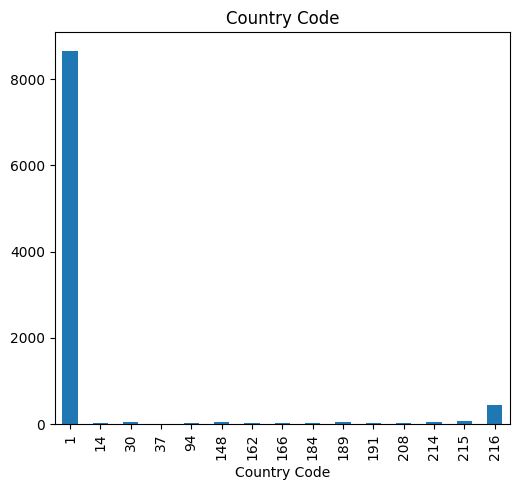

In [19]:
# plot bar charts for analyzing cat data
plot_barcharts(ZomatoData, ['Country Code'])

array([[<Axes: title={'center': 'Country Code'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Average Cost for two'}>],
       [<Axes: title={'center': 'Aggregate rating'}>,
        <Axes: title={'center': 'Votes'}>]], dtype=object)

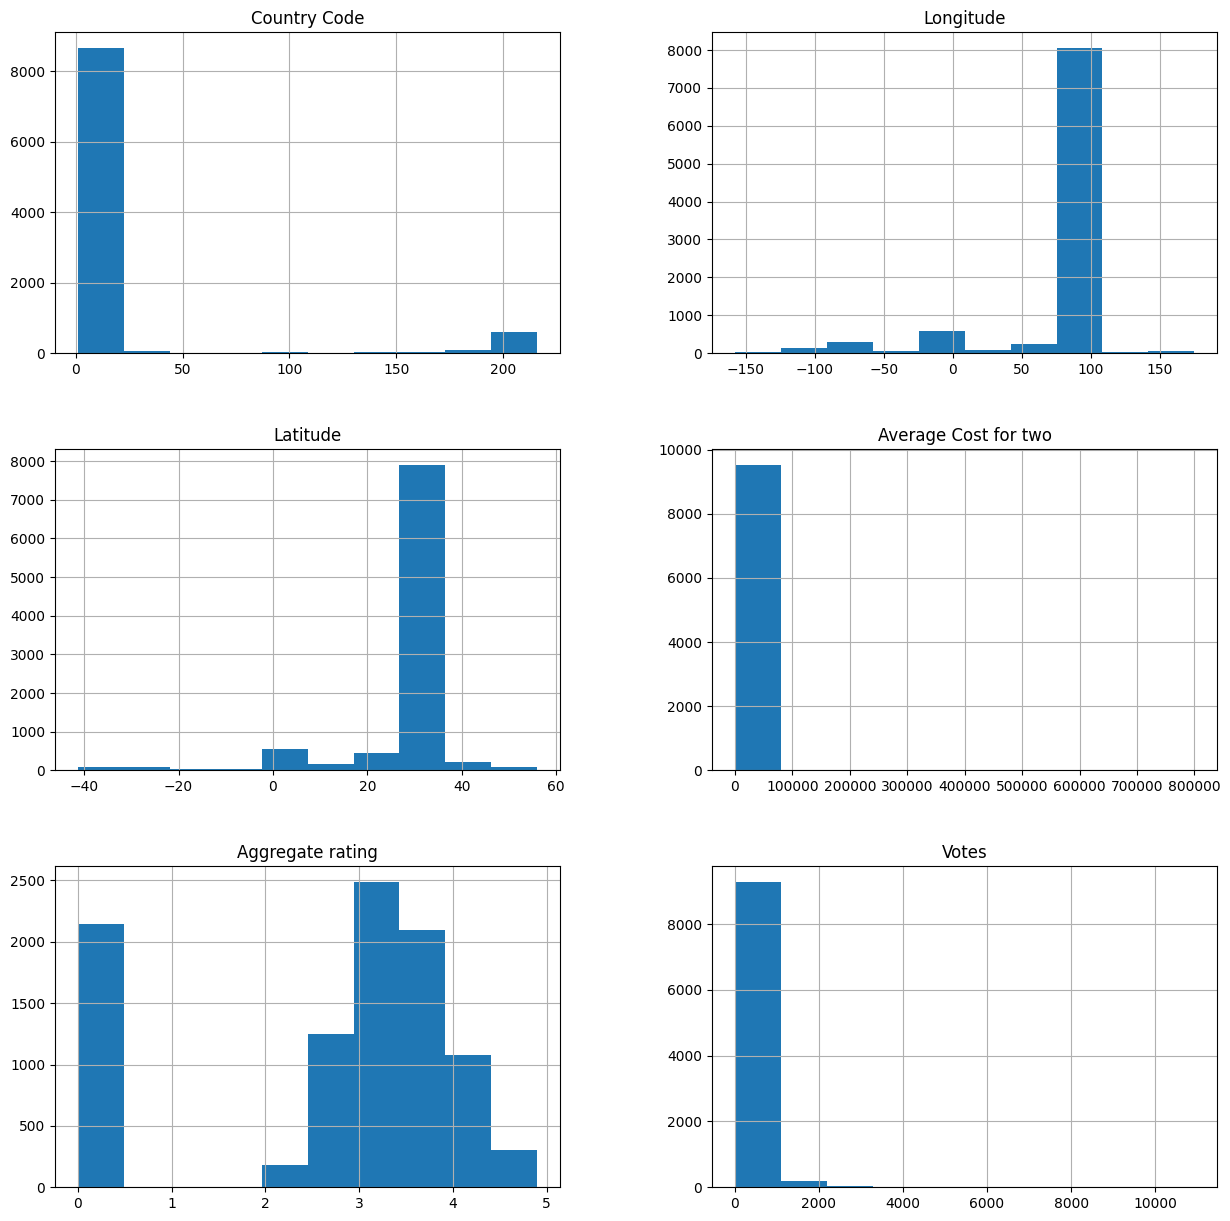

In [20]:
# data analysis for the cont variables
ZomatoData[['Country Code', 'Longitude', 'Latitude',  'Average Cost for two', 'Aggregate rating', 'Votes']].hist(figsize=(15,15))

In [21]:
Columns_to_be_removed = col_details[col_details['Description'].str.contains('Cnt_Use', case=False)]['Column']
Columns_to_be_removed

0            Restaurant ID
1          Restaurant Name
2             Country Code
3                     City
4                  Address
5                 Locality
6         Locality Verbose
11                Currency
14       Is delivering now
15    Switch to order menu
Name: Column, dtype: object

In [22]:
ZomatoData = ZomatoData.drop(columns=Columns_to_be_removed, axis=1)
ZomatoData

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,Dark Green,Excellent,591
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Green,Very Good,270
3,121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,Dark Green,Excellent,365
4,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,Turkish,80,No,No,3,4.1,Green,Very Good,788
9547,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,3,4.2,Green,Very Good,1034
9548,29.034640,41.055817,"Italian, World Cuisine",170,No,No,4,3.7,Yellow,Good,661
9549,29.036019,41.057979,Restaurant Cafe,120,No,No,4,4.0,Green,Very Good,901


In [23]:
#Analyzing corelation
# Lets consider 20% as a threshold to consider var
ZomatoData[['Longitude', 'Latitude',  'Average Cost for two', 'Aggregate rating', 'Votes']].corr(method='spearman')['Aggregate rating']*100

Longitude               -13.869683
Latitude                 -5.604598
Average Cost for two     22.002229
Aggregate rating        100.000000
Votes                    84.624672
Name: Aggregate rating, dtype: float64

In [24]:
col_details[col_details['Description'].str.contains('Can_Use', case=False)]

,Column,Data Type,Unique Values,Col Type,Description
7,Longitude,float64,8120,Continuous Num data,"Can_Use.Uneven Dist,has Out"
8,Latitude,float64,8677,Continuous Num data,"Can_Use.Uneven Dist,has Out"
9,Cuisines,object,1825,Qualitative Data,Can_Use.Ned to groupby cusines
10,Average Cost for two,int64,140,Continuous Num data,Can_Use.Has out
12,Has Table booking,object,2,Nominal Categorical data,Can_Use.
13,Has Online delivery,object,2,Nominal Categorical data,Can_Use.
16,Price range,int64,4,Ordinal Categorical data,Can_Use.
17,Aggregate rating,float64,33,Continuous Num data,Can_Use.Targt Variable
18,Rating color,object,6,Ordinal Categorical data,Can_Use.
19,Rating text,object,6,Ordinal Categorical data,Can_Use.


In [25]:
anova_cprr = cal_anova(dataset=ZomatoData, inp_features=['Has Table booking', 'Has Online delivery',
                                                         'Price range', 'Rating color',
                                                        'Rating text'], target_feature='Aggregate rating')
print(anova_cprr[0])
print("Selected Categorical features: ",anova_cprr[1])

Points to consider
------------------

1. Assumption(H0) is inpfeature and Target are NOT correlated
2. We accept the Assumption(H0) only when P-Value > 0.05

p-value for Has Table booking = 2.4808519133558066e-78
p-value for Has Online delivery = 1.4004463504064177e-110
p-value for Price range = 0.0
p-value for Rating color = 0.0
p-value for Rating text = 0.0

Selected Categorical features:  ['Has Table booking', 'Has Online delivery', 'Price range', 'Rating color', 'Rating text']


<Axes: xlabel='Average Cost for two', ylabel='Aggregate rating'>

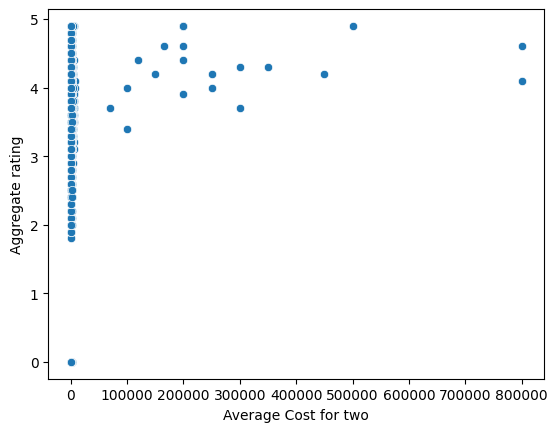

In [26]:
# Plot scatterplot vs target
import seaborn as sns
sns.scatterplot(data=ZomatoData, x='Average Cost for two', y='Aggregate rating')

<Axes: xlabel='Aggregate rating', ylabel='Count'>

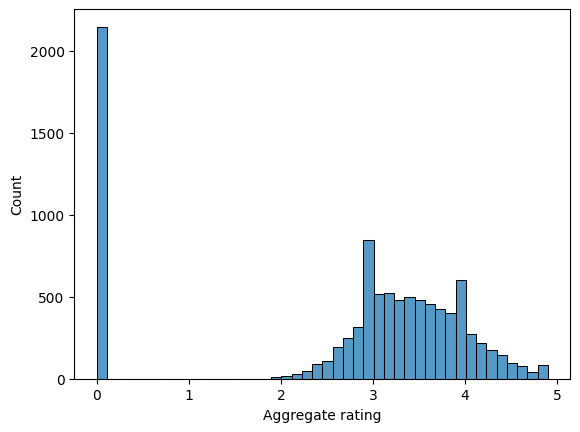

In [27]:
sns.histplot(data=ZomatoData, x='Aggregate rating')

<Axes: xlabel='Average Cost for two', ylabel='Count'>

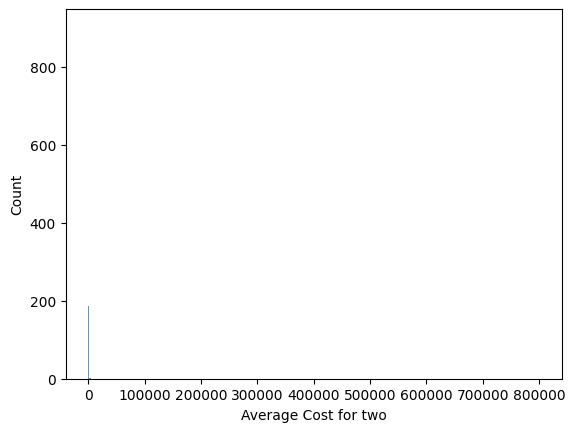

In [28]:
sns.histplot(data=ZomatoData, x='Average Cost for two')

<Axes: xlabel='Votes', ylabel='Count'>

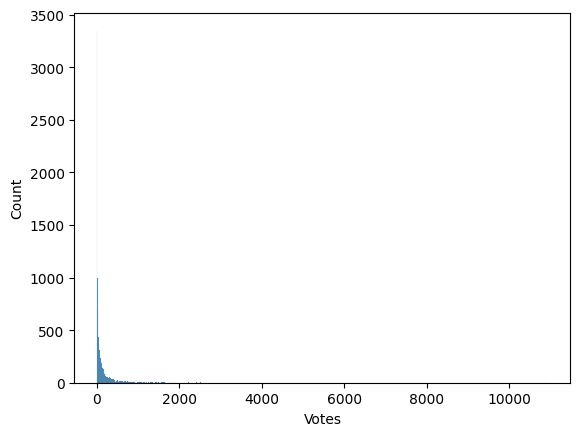

In [29]:
sns.histplot(data=ZomatoData, x='Votes')

<Axes: xlabel='Votes', ylabel='Aggregate rating'>

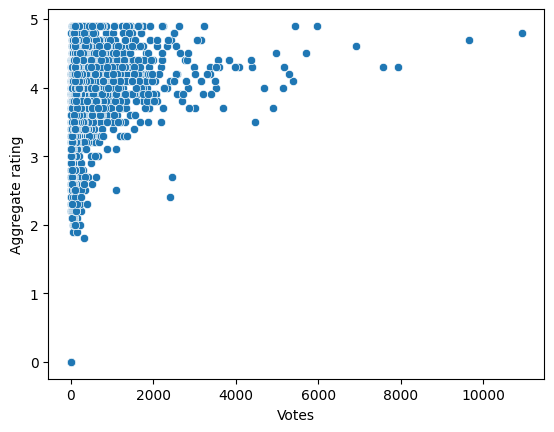

In [30]:
sns.scatterplot(data=ZomatoData, x='Votes', y='Aggregate rating')

<Axes: xlabel='Has Table booking', ylabel='Aggregate rating'>

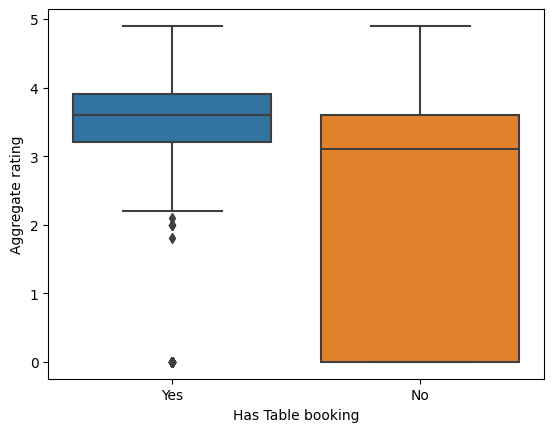

In [31]:
#plot barcharts
#sns.barplot(data=ZomatoData, x='Has Table booking', y='Aggregate rating')
sns.boxplot(data=ZomatoData, x='Has Table booking', y='Aggregate rating')

<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

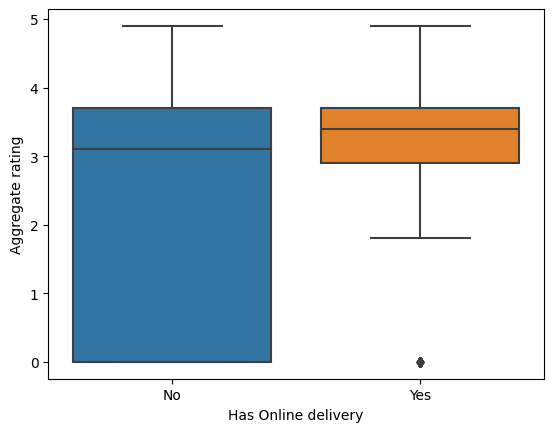

In [32]:
sns.boxplot(data=ZomatoData, x='Has Online delivery', y='Aggregate rating')

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

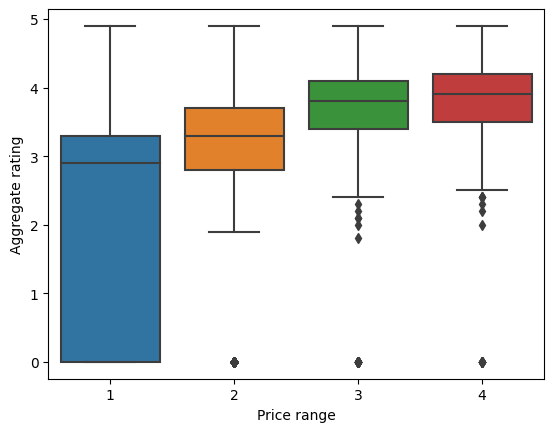

In [33]:
sns.boxplot(data=ZomatoData, x='Price range', y='Aggregate rating')

<Axes: xlabel='Rating color', ylabel='Aggregate rating'>

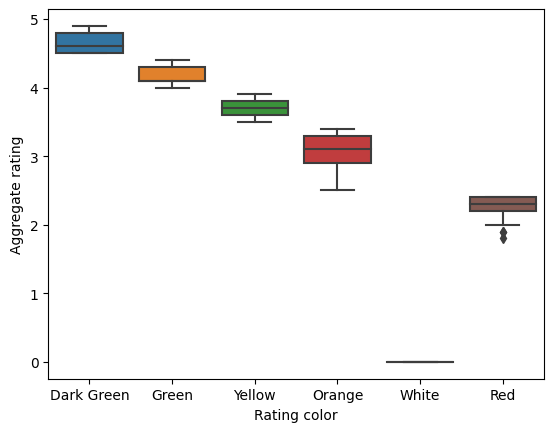

In [34]:
sns.boxplot(data=ZomatoData, x='Rating color', y='Aggregate rating')

<Axes: xlabel='Rating text', ylabel='Aggregate rating'>

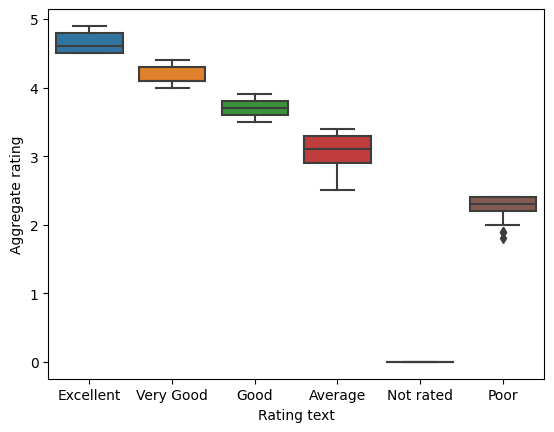

In [35]:
sns.boxplot(data=ZomatoData, x='Rating text', y='Aggregate rating')

In [36]:
ZomatoDF = ZomatoData.copy()
ZomatoDF

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,Dark Green,Excellent,591
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Green,Very Good,270
3,121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,Dark Green,Excellent,365
4,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,Turkish,80,No,No,3,4.1,Green,Very Good,788
9547,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,3,4.2,Green,Very Good,1034
9548,29.034640,41.055817,"Italian, World Cuisine",170,No,No,4,3.7,Yellow,Good,661
9549,29.036019,41.057979,Restaurant Cafe,120,No,No,4,4.0,Green,Very Good,901


In [37]:
ZomatoDF.shape

(9551, 11)

In [38]:
ZomatoDF.drop_duplicates(inplace=True)

In [39]:
#Aggregate rating
ZomatoDF[(ZomatoDF['Aggregate rating'] > 5.0) & (ZomatoDF['Aggregate rating'] < 0.0)]

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


In [40]:
def Extreme_IQR_for_skewed(dataset, feature):
    """
    Calculates upper and lower limit based on IQR
    for skewed distribution.

    parameters:
    dataset: dataframe
    feature: feature to calculate IQR

    returns:
    upper_limit: Upper threshold
    lower_limit: Lower threshold
    lower_bound_outlier_index(list)
    upper_bound_outlier_index(list)
    outlier_index: index of outliers acc to IQR(list)
    """

    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + (3 * IQR)
    lower_limit = Q1 - (3 * IQR)

    lc = dataset[feature] < lower_limit
    lower_bound_outlier_index = dataset[lc].index
    uc = dataset[feature] > upper_limit
    upper_bound_outlier_index = dataset[uc].index
    outlier_index = dataset[lc | uc].index

    return (upper_limit, lower_limit, lower_bound_outlier_index, upper_bound_outlier_index, outlier_index)


In [41]:
avg_out = Extreme_IQR_for_skewed(ZomatoDF, 'Average Cost for two')[4]
avg_out

Int64Index([   2,    8,   20,  630,  631,  633,  727,  802, 1122, 1189,
            ...
            9499, 9501, 9502, 9504, 9506, 9508, 9511, 9512, 9513, 9514],
           dtype='int64', length=258)

In [42]:
ZomatoDF.loc[avg_out, 'Average Cost for two'] = 2050

<Axes: xlabel='Average Cost for two', ylabel='Count'>

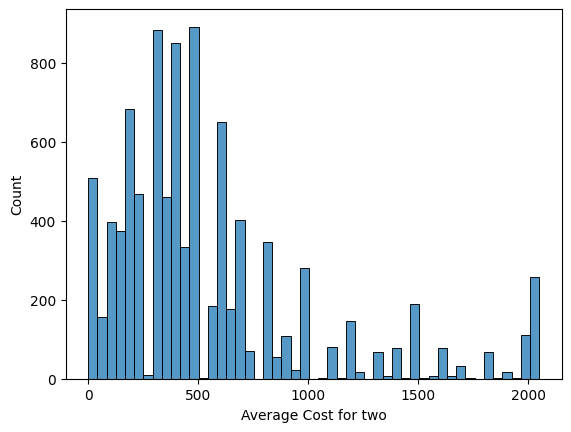

In [43]:
sns.histplot(data=ZomatoDF, x='Average Cost for two')

In [44]:
votes_out = Extreme_IQR_for_skewed(ZomatoDF, 'Votes')
votes_out[4]

Int64Index([   1,    6,    7,    8,    9,   10,   20,   21,  103,  104,
            ...
            9540, 9541, 9543, 9544, 9545, 9546, 9547, 9548, 9549, 9550],
           dtype='int64', length=684)

In [45]:
votes_rand_val = np.random.randint(1, votes_out[0]+1, size=len(votes_out[4]))

In [46]:
ZomatoDF.loc[votes_out[4], 'Votes'] = votes_rand_val

<Axes: xlabel='Votes', ylabel='Count'>

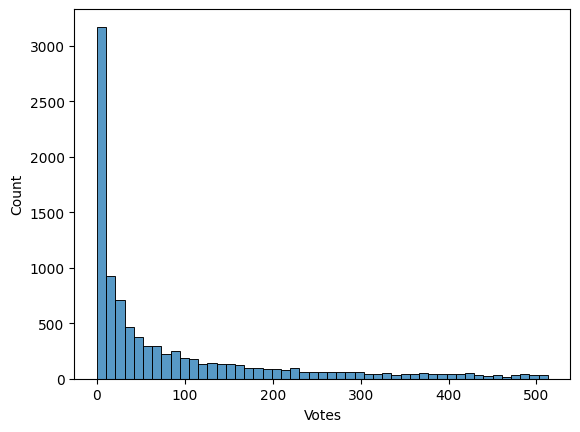

In [47]:
sns.histplot(data=ZomatoDF, x='Votes')

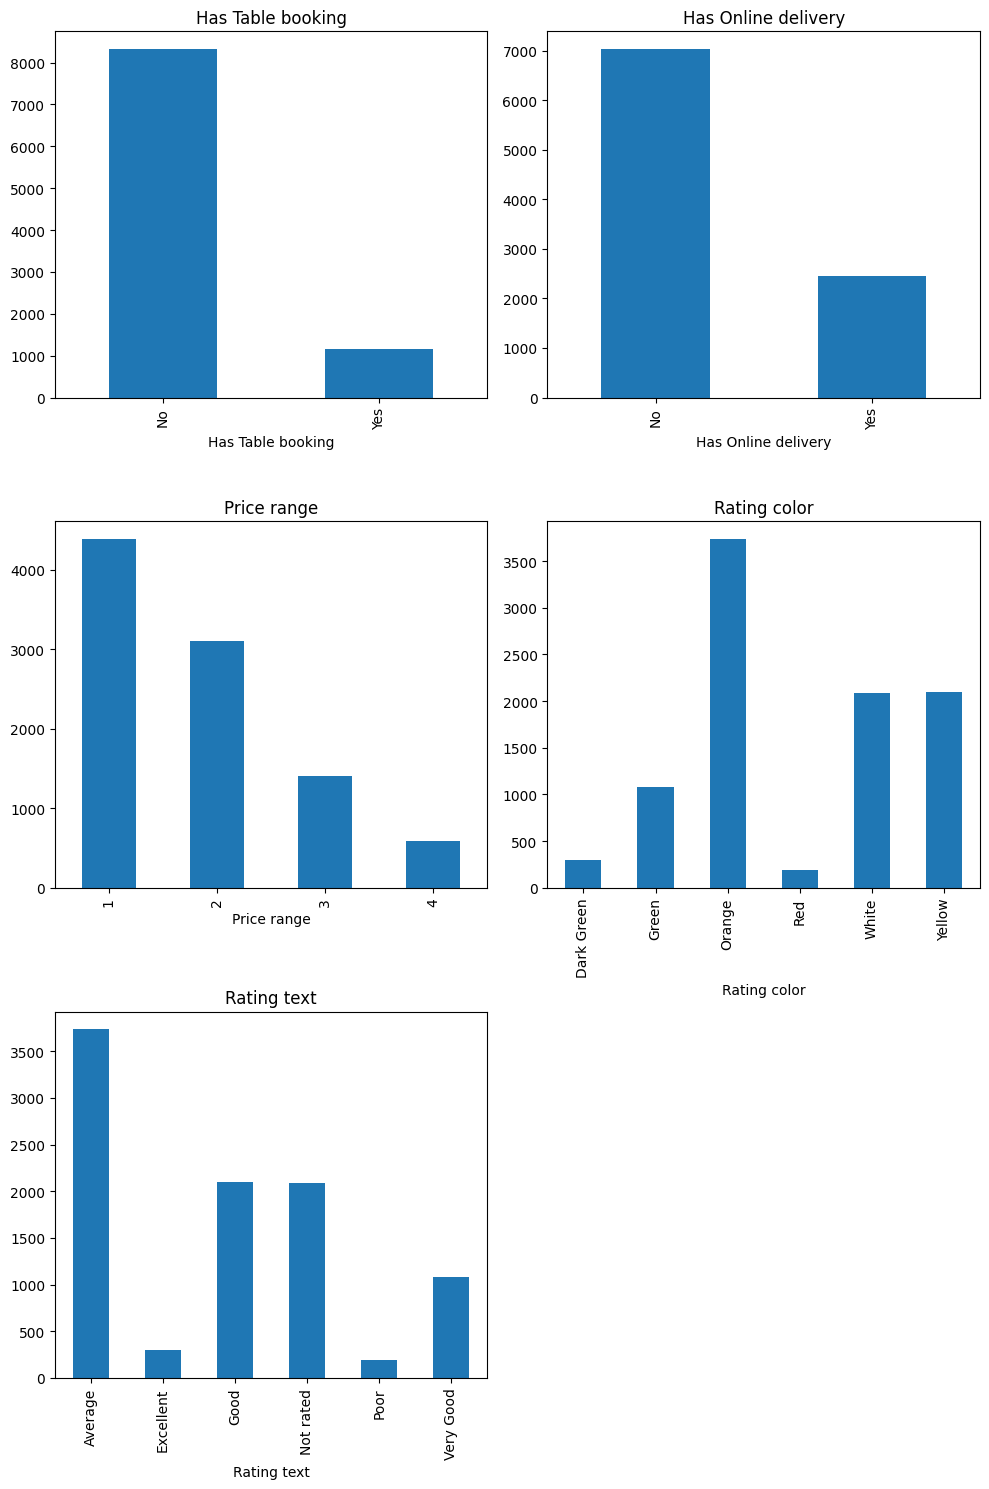

In [48]:
plot_barcharts(dataset=ZomatoDF, columns=['Has Table booking', 'Has Online delivery', 'Price range', 'Rating color', 'Rating text'])

In [49]:
ZomatoDF.isnull().sum()

Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [50]:
ZomatoDF['Cuisines'].value_counts()

North Indian                                             909
North Indian, Chinese                                    506
Chinese                                                  350
Fast Food                                                350
North Indian, Mughlai                                    333
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [51]:
ZomatoDF['Cuisines'].fillna('North Indian', inplace=True)

In [52]:
ZomatoDF.isnull().sum()

Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [53]:
ZomatoDF

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,Dark Green,Excellent,343
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",2050,Yes,No,4,4.4,Green,Very Good,270
3,121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,Dark Green,Excellent,365
4,121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,Turkish,80,No,No,3,4.1,Green,Very Good,293
9547,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,3,4.2,Green,Very Good,149
9548,29.034640,41.055817,"Italian, World Cuisine",170,No,No,4,3.7,Yellow,Good,217
9549,29.036019,41.057979,Restaurant Cafe,120,No,No,4,4.0,Green,Very Good,439


In [54]:
unique_cuisines = ZomatoDF['Cuisines'].str.split(',').explode()
unique_cuisines.value_counts().head(14)

North Indian     2967
 Chinese         1874
 Fast Food       1313
 North Indian     965
Chinese           849
 Mughlai          778
Fast Food         667
Cafe              613
Bakery            610
 Italian          530
 Continental      501
 Desserts         499
 South Indian     373
 Street Food      326
Name: Cuisines, dtype: int64

In [55]:
cuisine_mapping = {
    'North Indian': 'Indian',
    'Chinese': 'Chinese',
    'Fast Food': 'Fast Food',
    'Mughlai': 'Indian',
    'Bakery': 'Cafe',
    'Cafe': 'Cafe',
    'Street Food': 'Fast Food'
}

def replace_cuisines(cuisine):
    # if cuisine contains both indian and chinese, rep with Asian
    if "Indian" in cuisine and "Chinese" in cuisine:
        return "Asian"

    for key in cuisine_mapping:
      if key in cuisine:
            return cuisine_mapping[key]
    return "Others"

<Axes: xlabel='Cuisines_Upd'>

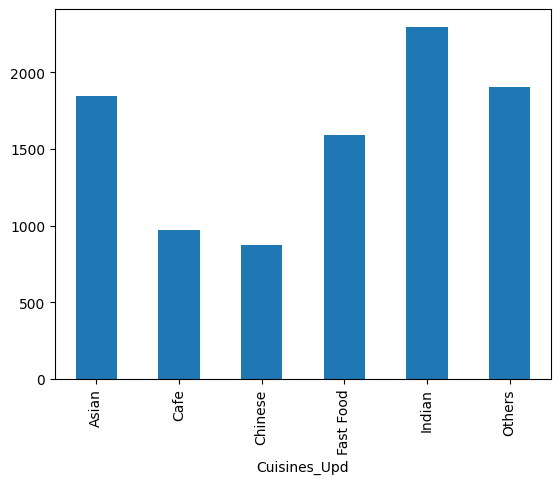

In [56]:
ZomatoDF['Cuisines_Upd'] = ZomatoDF['Cuisines'].map(replace_cuisines)

ZomatoDF.groupby(by='Cuisines_Upd').size().plot(kind='bar')

In [57]:
#Remove original column
ZomatoDF.drop(columns='Cuisines', axis=1, inplace=True)
ZomatoDF

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines_Upd
0,121.027535,14.565443,1100,Yes,No,3,4.8,Dark Green,Excellent,314,Others
1,121.014101,14.553708,1200,Yes,No,3,4.5,Dark Green,Excellent,343,Others
2,121.056831,14.581404,2050,Yes,No,4,4.4,Green,Very Good,270,Others
3,121.056475,14.585318,1500,No,No,4,4.9,Dark Green,Excellent,365,Others
4,121.057508,14.584450,1500,Yes,No,4,4.8,Dark Green,Excellent,229,Others
...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,80,No,No,3,4.1,Green,Very Good,293,Others
9547,29.041297,41.009847,105,No,No,3,4.2,Green,Very Good,149,Cafe
9548,29.034640,41.055817,170,No,No,4,3.7,Yellow,Good,217,Others
9549,29.036019,41.057979,120,No,No,4,4.0,Green,Very Good,439,Cafe


In [58]:
ZomatoDF.rename(columns={'Cuisines_Upd': 'Cuisines'}, inplace=True)
ZomatoDF



,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisines
0,121.027535,14.565443,1100,Yes,No,3,4.8,Dark Green,Excellent,314,Others
1,121.014101,14.553708,1200,Yes,No,3,4.5,Dark Green,Excellent,343,Others
2,121.056831,14.581404,2050,Yes,No,4,4.4,Green,Very Good,270,Others
3,121.056475,14.585318,1500,No,No,4,4.9,Dark Green,Excellent,365,Others
4,121.057508,14.584450,1500,Yes,No,4,4.8,Dark Green,Excellent,229,Others
...,...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,80,No,No,3,4.1,Green,Very Good,293,Others
9547,29.041297,41.009847,105,No,No,3,4.2,Green,Very Good,149,Cafe
9548,29.034640,41.055817,170,No,No,4,3.7,Yellow,Good,217,Others
9549,29.036019,41.057979,120,No,No,4,4.0,Green,Very Good,439,Cafe


In [59]:
def rated_flag(rating):
    if rating == 0.0:
        return 1
    else:
        return 0

ZomatoDF['Rated_Flag'] = ZomatoDF['Aggregate rating'].map(rated_flag)

In [60]:
ZomatoDF_unencoded = ZomatoDF.copy()

In [61]:
ZomatoDF = pd.get_dummies(ZomatoDF, columns=['Has Table booking' , 'Has Online delivery'], drop_first=True)

In [62]:
ZomatoDF['Rating text'].value_counts()

Average      3737
Good         2100
Not rated    2084
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [63]:
rating_mapping = {
    'Not rated': 0,
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

def rating_map(rating):
    for key in rating_mapping:
        if rating in key:
            return rating_mapping[key]
    return rating

In [64]:
ZomatoDF['Rating'] = ZomatoDF['Rating text'].map(rating_map)

In [65]:
ZomatoDF.drop(columns=['Rating color', 'Rating text', 'Cuisines'], axis=1, inplace=True)
ZomatoDF

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Rated_Flag,Has Table booking_Yes,Has Online delivery_Yes,Rating
0,121.027535,14.565443,1100,3,4.8,314,0,1,0,5
1,121.014101,14.553708,1200,3,4.5,343,0,1,0,5
2,121.056831,14.581404,2050,4,4.4,270,0,1,0,4
3,121.056475,14.585318,1500,4,4.9,365,0,0,0,5
4,121.057508,14.584450,1500,4,4.8,229,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...
9546,28.977392,41.022793,80,3,4.1,293,0,0,0,4
9547,29.041297,41.009847,105,3,4.2,149,0,0,0,4
9548,29.034640,41.055817,170,4,3.7,217,0,0,0,3
9549,29.036019,41.057979,120,4,4.0,439,0,0,0,4


In [66]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaled_data = std_scaler.fit_transform(ZomatoDF)
ZomatoDF_Standardaized = pd.DataFrame(std_scaled_data, columns=ZomatoDF.columns)
ZomatoDF_Standardaized

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Rated_Flag,Has Table booking_Yes,Has Online delivery_Yes,Rating
0,1.368377,-1.057206,1.142400,1.313542,1.405321,1.905729,-0.530573,2.681897,-0.590213,2.141433
1,1.368052,-1.058289,1.353479,1.313542,1.206045,2.148535,-0.530573,2.681897,-0.590213,2.141433
2,1.369087,-1.055734,3.147649,2.416629,1.139620,1.537333,-0.530573,2.681897,-0.590213,1.406791
3,1.369078,-1.055373,1.986715,2.416629,1.471746,2.332733,-0.530573,-0.372870,-0.590213,2.141433
4,1.369103,-1.055453,1.986715,2.416629,1.405321,1.194055,-0.530573,2.681897,-0.590213,2.141433
...,...,...,...,...,...,...,...,...,...,...
9482,-0.861918,1.383461,-1.010605,1.313542,0.940344,1.729903,-0.530573,-0.372870,-0.590213,1.406791
9483,-0.860370,1.382266,-0.957835,1.313542,1.006769,0.524244,-0.530573,-0.372870,-0.590213,1.406791
9484,-0.860531,1.386507,-0.820634,2.416629,0.674643,1.093583,-0.530573,-0.372870,-0.590213,0.672150
9485,-0.860498,1.386707,-0.926173,2.416629,0.873919,2.952308,-0.530573,-0.372870,-0.590213,1.406791


In [67]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

nrm_scaler = MinMaxScaler()
nrm_scaled_data = nrm_scaler.fit_transform(ZomatoDF)
ZomatoDF_Normalized = pd.DataFrame(nrm_scaled_data, columns=ZomatoDF.columns)
ZomatoDF_Normalized

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Rated_Flag,Has Table booking_Yes,Has Online delivery_Yes,Rating
0,0.838318,0.574426,0.536585,0.666667,0.979592,0.612086,0.0,1.0,0.0,1.0
1,0.838278,0.574305,0.585366,0.666667,0.918367,0.668616,0.0,1.0,0.0,1.0
2,0.838406,0.574590,1.000000,1.000000,0.897959,0.526316,0.0,1.0,0.0,0.8
3,0.838405,0.574630,0.731707,1.000000,1.000000,0.711501,0.0,0.0,0.0,1.0
4,0.838408,0.574621,0.731707,1.000000,0.979592,0.446394,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9482,0.561709,0.846320,0.039024,0.666667,0.836735,0.571150,0.0,0.0,0.0,0.8
9483,0.561901,0.846187,0.051220,0.666667,0.857143,0.290448,0.0,0.0,0.0,0.8
9484,0.561881,0.846660,0.082927,1.000000,0.755102,0.423002,0.0,0.0,0.0,0.6
9485,0.561885,0.846682,0.058537,1.000000,0.816327,0.855750,0.0,0.0,0.0,0.8


In [68]:
# Train test Split of datasets

from sklearn.model_selection import train_test_split

# Dictionary of datasets
datasets = {
    'ZomatoDF_unencoded': ZomatoDF_unencoded,
    'ZomatoDF': ZomatoDF,
    'ZomatoDF_Standardaized': ZomatoDF_Standardaized,
    'ZomatoDF_Normalized': ZomatoDF_Normalized
}

# Target Column
target_column_name = 'Aggregate rating'
# Dictionary to store train and test splits for each dataset
data_splits = {}

# Loop through each dataset
for dataset_name, dataset in datasets.items():
    # Split dataset into features (X) and target (y)
    X = dataset.drop(target_column_name, axis=1)
    y = dataset[target_column_name]

    # Split into train and test sets
    data_splits[dataset_name] = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
def LinearRegressionAlgo(dataset_name):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
    """
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    import numpy as np

    X_train, X_test, y_train, y_test = data_splits[dataset_name]

    LRM = LinearRegression()
    LRM.fit(X_train, y_train)
    prediction_train = LRM.predict(X_train)
    prediction = LRM.predict(X_test)
    # R2
    print("R2 score - Trained data: ", metrics.r2_score(y_train, prediction_train))
    print("R2 score - Test data: ", metrics.r2_score(y_test, prediction))

    # SSE
    print("SSE - Trained data: ",np.sum(np.power((y_train - prediction_train),2)))
    print("SSE - Test data: ",np.sum(np.power((y_test - prediction),2)))

    # MSE
    print("MSE - Trained data: ", metrics.mean_squared_error(y_train, prediction_train))
    print("MSE - Test data: ", metrics.mean_squared_error(y_test, prediction))


    # RMSE
    print("RMSE - Trained data: ", metrics.mean_squared_error(y_train, prediction_train, squared=False))
    print("RMSE - Test data: ", metrics.mean_squared_error(y_test, prediction, squared=False))

    # Accuracy
    print("Accuracy - Train data: ", 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100))
    print("Accuracy - Test data: ", 100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

    # Plot the Error (Actual - Predicted)
    np.abs((y_train - prediction_train)).plot(kind='hist')


R2 score - Trained data:  0.9856016304023733
R2 score - Test data:  0.984490503397464
SSE - Trained data:  93.02373985592945
SSE - Test data:  46.870606805902284
MSE - Trained data:  0.014635578957824016
MSE - Test data:  0.014969852061929826
RMSE - Trained data:  0.12097759692531512
RMSE - Test data:  0.12235134679246415
Accuracy - Train data:  5.357599564860237
Accuracy - Test data:  4.430620254314178


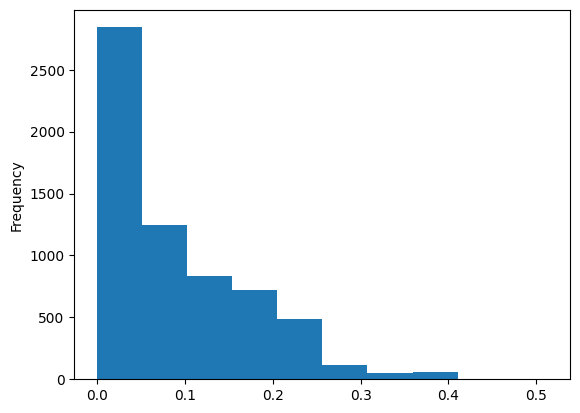

In [70]:
# Run Linear Regression Algo for Standardized data

# Standardized
LinearRegressionAlgo(dataset_name= 'ZomatoDF_Standardaized')

R2 score - Trained data:  0.9856016304023733
R2 score - Test data:  0.984490503397464
SSE - Trained data:  8.780826717416204
SSE - Test data:  4.424275750901696
MSE - Trained data:  0.0013815020008521404
MSE - Test data:  0.0014130551743537834
RMSE - Trained data:  0.03716856199602213
RMSE - Test data:  0.03759062615006278
Accuracy - Train data:  -inf
Accuracy - Test data:  -inf


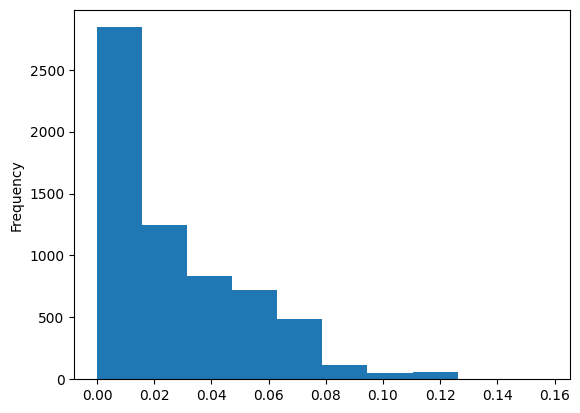

In [71]:
# Run Linear Regression Algo for Regularized data

# Normalized
LinearRegressionAlgo(dataset_name='ZomatoDF_Normalized')

R2 score - Trained data:  0.9856016304023733
R2 score - Test data:  0.9844905033974636
SSE - Trained data:  210.82764948516308
SSE - Test data:  106.22686077915222
MSE - Trained data:  0.03316986304045989
MSE - Test data:  0.03392745473623514
RMSE - Trained data:  0.18212595378050844
RMSE - Test data:  0.18419406813530978
Accuracy - Train data:  -inf
Accuracy - Test data:  -inf


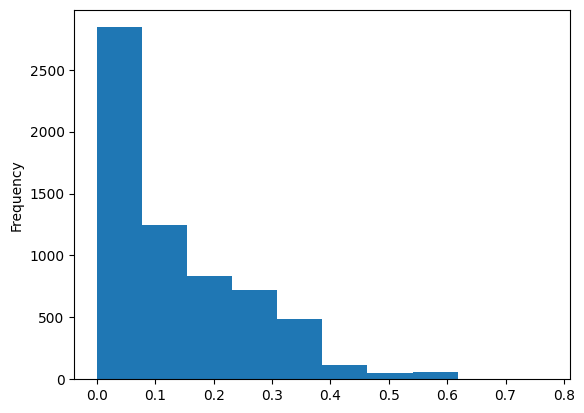

In [72]:
 #Run Linear Regression Algo for non Scaled data

LinearRegressionAlgo(dataset_name='ZomatoDF')

In [73]:
def RidgeRegressionAlgo(dataset_name):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
    """
    from sklearn.linear_model import Ridge
    from sklearn import metrics
    import numpy as np

    X_train, X_test, y_train, y_test = data_splits[dataset_name]

    ridge = Ridge()
    ridge.fit(X_train, y_train)
    prediction_train_ridge = ridge.predict(X_train)
    prediction_ridge = ridge.predict(X_test)

    # R2 score
    print("R2 score - Trained data (Ridge): ", np.round(metrics.r2_score(y_train, prediction_train_ridge),2))
    print("R2 score - Test data (Ridge): ", np.round(metrics.r2_score(y_test, prediction_ridge),2))

    # SSE
    print("SSE - Trained data (Ridge): ", np.round(np.sum(np.power((y_train - prediction_train_ridge), 2)),2))
    print("SSE - Test data (Ridge): ", np.round(np.sum(np.power((y_test - prediction_ridge), 2)),2))
    # MSE
    print("MSE - Trained data (Ridge): ", np.round(metrics.mean_squared_error(y_train, prediction_train_ridge),2))
    print("MSE - Test data (Ridge): ", np.round(metrics.mean_squared_error(y_test, prediction_ridge),2))

    # RMSE
    print("RMSE - Trained data (Ridge): ", np.round(metrics.mean_squared_error(y_train, prediction_train_ridge, squared=False),2))
    print("RMSE - Test data (Ridge): ", np.round(metrics.mean_squared_error(y_test, prediction_ridge, squared=False),2))
    # Accuracy
    accuracy_train = np.round(100 - (np.mean(np.abs((y_train - prediction_train_ridge) / y_train)) * 100), 2)
    accuracy_test = np.round(100 - (np.mean(np.abs((y_test - prediction_ridge) / y_test)) * 100), 2)
    print("Accuracy - Train data (Ridge): ", accuracy_train)
    print("Accuracy - Test data (Ridge): ", accuracy_test)

    # Plot the Error (Actual - Predicted)
    np.abs((y_train - prediction_train_ridge)).plot(kind='hist')
    plt.xlabel("Absolute Error (Actual - Predicted)")

    # Coefficients
    print("Coefficients:", ridge.coef_)

R2 score - Trained data (Ridge):  0.99
R2 score - Test data (Ridge):  0.98
SSE - Trained data (Ridge):  93.02
SSE - Test data (Ridge):  46.87
MSE - Trained data (Ridge):  0.01
MSE - Test data (Ridge):  0.01
RMSE - Trained data (Ridge):  0.12
RMSE - Test data (Ridge):  0.12
Accuracy - Train data (Ridge):  5.37
Accuracy - Test data (Ridge):  4.45
Coefficients: [-0.00565165 -0.00254837  0.00415968  0.00465709  0.01861497 -0.53824271
 -0.00177469 -0.0039794   0.49013121]


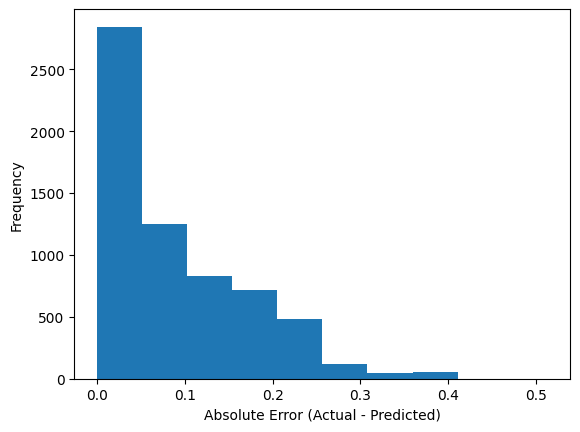

In [74]:
# Run Ridge Regression Algo for Standardized data

# Standardized
RidgeRegressionAlgo(dataset_name='ZomatoDF_Standardaized')

R2 score - Trained data (Ridge):  0.99
R2 score - Test data (Ridge):  0.98
SSE - Trained data (Ridge):  8.78
SSE - Test data (Ridge):  4.43
MSE - Trained data (Ridge):  0.0
MSE - Test data (Ridge):  0.0
RMSE - Trained data (Ridge):  0.04
RMSE - Test data (Ridge):  0.04
Accuracy - Train data (Ridge):  -inf
Accuracy - Test data (Ridge):  -inf
Coefficients: [-0.01447751 -0.0072112   0.00513098  0.00552714  0.02589944 -0.4006566
 -0.00174448 -0.00280301  0.54947238]


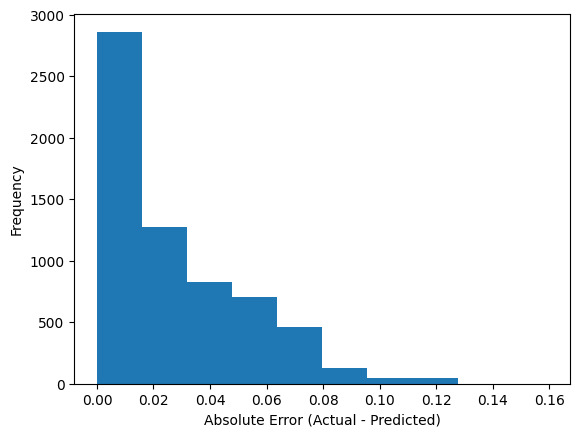

In [75]:
# Run Ridge Regression Algo for Normalized data

# Normalized
RidgeRegressionAlgo(dataset_name='ZomatoDF_Normalized')

In [76]:
def LassoRegressionAlgo(dataset_name):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
    """

    from sklearn.linear_model import Lasso
    from sklearn import metrics
    import numpy as np

    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    lasso = Lasso(max_iter=10000)  # Increase the maximum number of iterations
    lasso.fit(X_train, y_train)
    prediction_train_lasso = lasso.predict(X_train)
    prediction_lasso = lasso.predict(X_test)

    # R2 score
    print("R2 score - Trained data: ", np.round(metrics.r2_score(y_train, prediction_train_lasso),2))
    print("R2 score - Test data: ", np.round(metrics.r2_score(y_test, prediction_lasso),2))
    # SSE
    print("SSE - Trained data: ", np.round(np.sum(np.power((y_train - prediction_train_lasso), 2)),2))
    print("SSE - Test data: ", np.round(np.sum(np.power((y_test - prediction_lasso), 2)),2))

    # MSE
    print("MSE - Trained data: ", np.round(metrics.mean_squared_error(y_train, prediction_train_lasso),2))
    print("MSE - Test data: ", np.round(metrics.mean_squared_error(y_test, prediction_lasso),2))
    # RMSE
    print("RMSE - Trained data: ", np.round(metrics.mean_squared_error(y_train, prediction_train_lasso, squared=False),2))
    print("RMSE - Test data: ", np.round(metrics.mean_squared_error(y_test, prediction_lasso, squared=False),2))

    # Accuracy
    accuracy_train = np.round(100 - (np.mean(np.abs((y_train - prediction_train_lasso) / y_train)) * 100), 2)
    accuracy_test = np.round(100 - (np.mean(np.abs((y_test - prediction_lasso) / y_test)) * 100), 2)
    print("Accuracy - Train data: ", accuracy_train)
    print("Accuracy - Test data: ", accuracy_test)
    # Plot the Error (Actual - Predicted)
    np.abs((y_train - prediction_train_lasso)).plot(kind='hist')
    plt.xlabel("Absolute Error (Actual - Predicted)")

    print(lasso.coef_)


R2 score - Trained data:  0.0
R2 score - Test data:  -0.0
SSE - Trained data:  6460.71
SSE - Test data:  3028.37
MSE - Trained data:  1.02
MSE - Test data:  0.97
RMSE - Trained data:  1.01
RMSE - Test data:  0.98
Accuracy - Train data:  -5.72
Accuracy - Test data:  -5.89
[-0. -0.  0.  0.  0. -0.  0.  0.  0.]


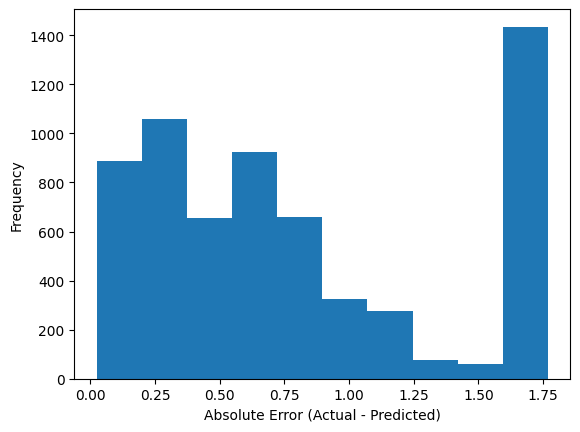

In [77]:
# Run Lasso Regression Algo for Standardized data

# Standardized
LassoRegressionAlgo(dataset_name='ZomatoDF_Standardaized')

R2 score - Trained data:  0.0
R2 score - Test data:  -0.0
SSE - Trained data:  609.85
SSE - Test data:  285.86
MSE - Trained data:  0.1
MSE - Test data:  0.09
RMSE - Trained data:  0.31
RMSE - Test data:  0.3
Accuracy - Train data:  -inf
Accuracy - Test data:  -inf
[-0. -0.  0.  0.  0. -0.  0.  0.  0.]


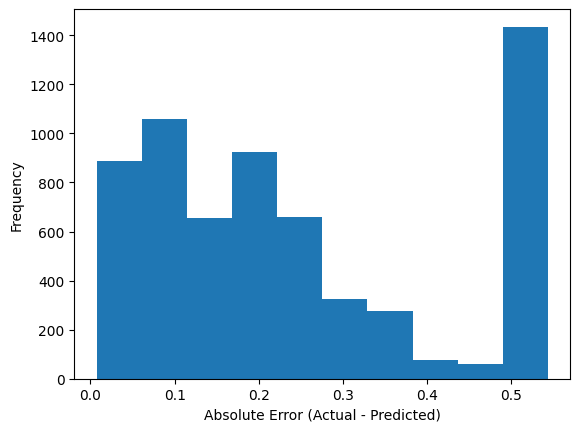

In [78]:
# Run Lasso Regression Algo for Normalized data

# Normalized
LassoRegressionAlgo(dataset_name='ZomatoDF_Normalized')

In [79]:
def decisionTress(dataset_name):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
    """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn import metrics
    import numpy as np

    d = {}
    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    predictors = X_train.columns
    for i in range(1,22,2):
        RegModel = DecisionTreeRegressor(max_depth=i,criterion='squared_error')

        #create model for train data
        DT=RegModel.fit(X_train,y_train)
        prediction_train=DT.predict(X_train)
        prediction_test=DT.predict(X_test)

        #Evaluation metrics

        #goodness of fit training data
        r2_train = metrics.r2_score(y_train, prediction_train)
        r2_test = metrics.r2_score(y_test, prediction_test)
        #accuracy of testing data
        #accuracy = metrics.accuracy_score(y_test,prediction)
        accuracy_train = 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100)
        accuracy_test = 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100)

        d[i] = [RegModel, r2_train, r2_test, accuracy_train, accuracy_test]

    # Plotting the feature importance for Top 10 most important columns
    %matplotlib inline
    feature_importances = pd.Series(DT.feature_importances_, index=predictors)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importance Plot")
    plt.ylabel('Features')
    return d

{1: [DecisionTreeRegressor(max_depth=1),
  0.8970179124714539,
  0.890625783866446,
  86.43939795388394,
  86.58140769713816],
 3: [DecisionTreeRegressor(max_depth=3),
  0.9834674302789325,
  0.9823016622758837,
  94.50517426888433,
  94.52018515868416],
 5: [DecisionTreeRegressor(max_depth=5),
  0.9870382898967706,
  0.9861284657020883,
  95.14202700973091,
  95.15205946028517],
 7: [DecisionTreeRegressor(max_depth=7),
  0.9878023874818039,
  0.9859963602874836,
  95.37593931527451,
  95.21956114928904],
 9: [DecisionTreeRegressor(max_depth=9),
  0.9887272196960887,
  0.9853617970940206,
  95.65132467966333,
  95.13726754767313],
 11: [DecisionTreeRegressor(max_depth=11),
  0.9900214741868938,
  0.9840868975762797,
  96.09070862535641,
  94.99618767057004],
 13: [DecisionTreeRegressor(max_depth=13),
  0.9915941577012182,
  0.982086157389742,
  96.67180693208091,
  94.78709993374197],
 15: [DecisionTreeRegressor(max_depth=15),
  0.9930696915829125,
  0.9803957899494065,
  97.2934102068

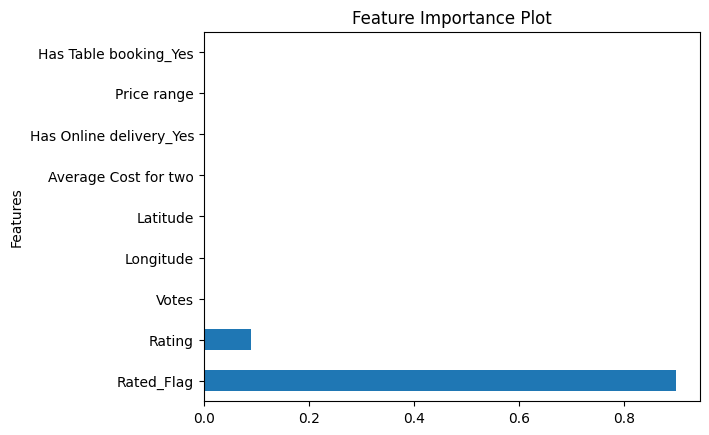

In [80]:
decisionTress(dataset_name='ZomatoDF')

In [81]:
# Define a score table to record scores during hyperparameter tuning.
Scores = pd.DataFrame(columns=['Estimators', 'MaxDepth', 'MaxFeatures', 'TrainRMSE', 'TestRMSE'])
Scores

,Estimators,MaxDepth,MaxFeatures,TrainRMSE,TestRMSE


In [82]:
def randomForest(dataset_name, n_estimators, max_depth, max_features):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
      n_estimators(int): No.of Estimators to build DT
      max_depth(int): Maximun depth to build DT
      max_features(float): Maximum features to select for DT. [0-1]
    """
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np


    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    RandomForest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                     max_features= max_features, random_state=2)
    RF = RandomForest.fit(X_train,y_train)
    PredictedTrain = RF.predict(X_train)
    PredictedTest = RF.predict(X_test)
    Accuracy = np.round(100- (np.mean(np.abs((y_train - PredictedTrain) / y_train)) * 100),2)
    MAE =  np.round(mean_absolute_error(y_train, PredictedTrain),2)
    MSE =  np.round(mean_squared_error(y_train, PredictedTrain),2)
    TrainRMSE =  np.round(mean_squared_error(y_train, PredictedTrain, squared=False),2)

    print("Train Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TrainRMSE)
    Accuracy = np.round(100- (np.mean(np.abs((y_test - PredictedTest) / y_test)) * 100),2)
    MAE = np.round(mean_absolute_error(y_test, PredictedTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictedTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictedTest, squared=False),2)

    print("Test Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TestRMSE)

    # Append all parameters to Scores DF
    Scores.loc[len(Scores)] = [n_estimators, max_depth, max_features, TrainRMSE, TestRMSE]
    print(Scores)



In [83]:
# Define a score table to record scores during hyperparameter tuning.
XGBScores = pd.DataFrame(columns=['Estimators', 'MaxDepth', 'LearningRate', 'TrainRMSE', 'TestRMSE'])
XGBScores

,Estimators,MaxDepth,LearningRate,TrainRMSE,TestRMSE


In [84]:
def XGBoostAlgo(dataset_name, n_estimators, max_depth, learning_rate):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
      max_depth(int): Maximun depth
      learning_rate(float): Learning rate of algorithm
    """
    from xgboost import XGBRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np

    # Train test split
    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    XGBoost = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                       objective='reg:squarederror', booster='gbtree')

    XGB = XGBoost.fit(X_train, y_train)

    PredictionTrain = XGB.predict(X_train)
    PredictionTest = XGB.predict(X_test)
    Accuracy = np.round(100- (np.mean(np.abs((y_train - PredictionTrain) / y_train)) * 100),2)
    MAE =  np.round(mean_absolute_error(y_train, PredictionTrain),2)
    MSE =  np.round(mean_squared_error(y_train, PredictionTrain),2)
    TrainRMSE =  np.round(mean_squared_error(y_train, PredictionTrain, squared=False),2)
    Accuracy = np.round(100- (np.mean(np.abs((y_test - PredictionTest) / y_test)) * 100),2)
    MAE = np.round(mean_absolute_error(y_test, PredictionTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictionTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictionTest, squared=False),2)

    print("Train Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TrainRMSE)
    XGBScores.loc[len(XGBScores)] = [n_estimators, max_depth, learning_rate, TrainRMSE, TestRMSE]
    print(XGBScores)

    # Plotting the feature importance for Top 10 most important columns
    %matplotlib inline
    feature_importances = pd.Series(XGB.feature_importances_, index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importance Plot")
    plt.ylabel('Features')
    from xgboost import plot_tree
    #import matplotlib.pyplot as plt

    # Plot the first tree
    plot_tree(XGB, num_trees=2, rankdir='UT')
    plt.show()




Train Scores
Accuracy:  -inf
MAE:  0.12
MSE:  0.03
RMSE:  0.16
   Estimators  MaxDepth  LearningRate  TrainRMSE  TestRMSE
0       300.0       3.0           0.1       0.16      0.17


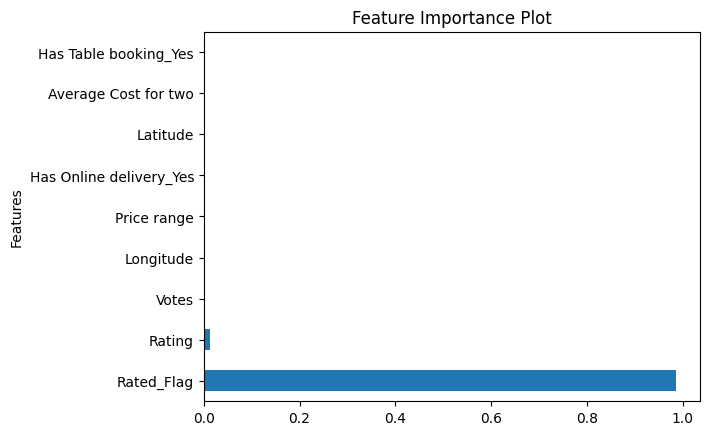

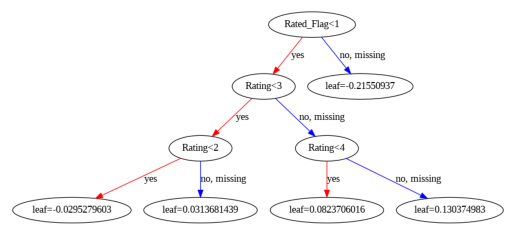

In [85]:
XGBoostAlgo('ZomatoDF', 300, 3, .1)

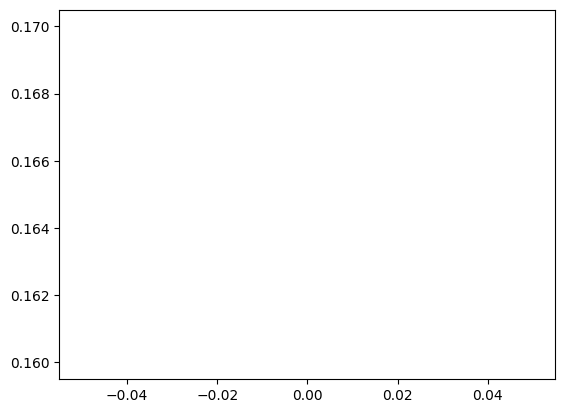

In [86]:
plt.plot(XGBScores['TestRMSE'], color='green')
plt.plot(XGBScores['TrainRMSE'], color='blue')

In [87]:
# Define a score table to record scores during hyperparameter tuning.
KNNScores = pd.DataFrame(columns=['n_neighbors', 'TrainRMSE', 'TestRMSE'])
KNNScores

,n_neighbors,TrainRMSE,TestRMSE


In [88]:
def knnAlgo(dataset_name, n_neighbors):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
      n_neighbors(int): No.of neighbours to use.
    """
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np

    # Train test split
    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
    neigh.fit(X_train, y_train)

    PredictionTrain = neigh.predict(X_train)
    PredictionTest = neigh.predict(X_test)

    #Train Scores

    Accuracy = np.round(100- (np.mean(np.abs((y_train - PredictionTrain) / y_train)) * 100),2)
    MAE =  np.round(mean_absolute_error(y_train, PredictionTrain),2)
    MSE =  np.round(mean_squared_error(y_train, PredictionTrain),2)
    TrainRMSE =  np.round(mean_squared_error(y_train, PredictionTrain, squared=False),2)
    Accuracy = np.round(100- (np.mean(np.abs((y_test - PredictionTest) / y_test)) * 100),2)
    MAE = np.round(mean_absolute_error(y_test, PredictionTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictionTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictionTest, squared=False),2)

    '''
    print("Test Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TestRMSE)
    '''

    KNNScores.loc[len(KNNScores)] = [n_neighbors, TrainRMSE, TestRMSE]


In [89]:
for i in range(1, 21, 2):
    knnAlgo(dataset_name='ZomatoDF', n_neighbors=i)

Text(0, 0.5, 'TestRMSE (Validation Error)')

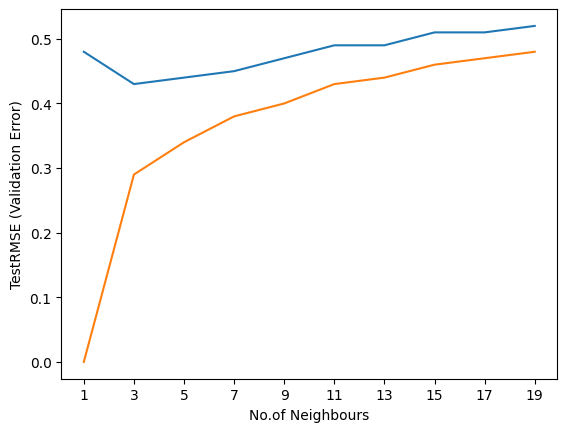

In [90]:
#plot the validation error
plt.plot(KNNScores['n_neighbors'], KNNScores['TestRMSE'], )
plt.plot(KNNScores['n_neighbors'], KNNScores['TrainRMSE'])
plt.xticks(ticks=KNNScores['n_neighbors'])
plt.xlabel("No.of Neighbours")
plt.ylabel("TestRMSE (Validation Error)")

In [91]:
# Define a score table to record scores during hyperparameter tuning.
AdaBoostScores = pd.DataFrame(columns=['Estimators', 'LearningRate', 'RandomState', 'TrainRMSE', 'TestRMSE'])
AdaBoostScores

,Estimators,LearningRate,RandomState,TrainRMSE,TestRMSE


In [92]:
def AdaBoostAlgo(dataset_name, n_estimators, learning_rate):
    """
    Args:
      daatset_name(str): Provide dataset name. Donot provide dataset directly.
      n_estimators(int): No.of Estimators, start with 50
      learning_rate(float): Learning rate of algorithm
    """
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import numpy as np

    # Train test split
    X_train, X_test, y_train, y_test = data_splits[dataset_name]
    #Parameters
    random_state = np.random.randint(1, 1000)

    AdaBoost = AdaBoostRegressor(n_estimators=n_estimators, learning_rate= learning_rate, random_state=random_state)
    AB = AdaBoost.fit(X_train, y_train)

    PredictionTrain = AB.predict(X_train)
    PredictionTest = AB.predict(X_test)

    #Train Scores

    Accuracy = np.round(100- (np.mean(np.abs((y_train - PredictionTrain) / y_train)) * 100),2)
    MAE =  np.round(mean_absolute_error(y_train, PredictionTrain),2)
    MSE =  np.round(mean_squared_error(y_train, PredictionTrain),2)
    TrainRMSE =  np.round(mean_squared_error(y_train, PredictionTrain, squared=False),2)

    print("Train Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TrainRMSE)
    Accuracy = np.round(100- (np.mean(np.abs((y_test - PredictionTest) / y_test)) * 100),2)
    MAE = np.round(mean_absolute_error(y_test, PredictionTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictionTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictionTest, squared=False),2)

    print("Test Scores")
    print("Accuracy: ",Accuracy)
    print("MAE: ", MAE)
    print("MSE: ",MSE)
    print("RMSE: ",TestRMSE)

    # Print some of the coefficients
    print("Estimators: ", AB.estimator_)
    print("Weights of estimators:", AB.estimator_weights_)
    print("Feature Importance: ", AB.feature_importances_)
    # Append all parameters to AdaBoostScores DF
    AdaBoostScores.loc[len(AdaBoostScores)] = [n_estimators, learning_rate, random_state, TrainRMSE, TestRMSE]
    print(AdaBoostScores)

    # Plotting the feature importance for Top 10 most important columns
    %matplotlib inline
    feature_importances = pd.Series(AB.feature_importances_, index=X_train.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importance Plot")
    plt.ylabel('Features')



Train Scores
Accuracy:  94.51
MAE:  0.14
MSE:  0.04
RMSE:  0.19
Test Scores
Accuracy:  94.51
MAE:  0.14
MSE:  0.04
RMSE:  0.2
Estimators:  DecisionTreeRegressor(max_depth=3)
Weights of estimators: [0.24496095 0.23506553 0.21763441 0.19827643 0.18289883 0.17212917
 0.15785994 0.13896364 0.12897584 0.11643738 0.11341839 0.09492624
 0.09254792 0.07930973 0.07654717 0.08124864 0.0699808  0.06119739
 0.05770685 0.06680632 0.05327095 0.04846566 0.04476089 0.05929951
 0.05033458 0.0378526  0.05200803 0.03671347 0.03265249 0.0304832
 0.02559017 0.0316433  0.01994264 0.02935869 0.0241869  0.01531382
 0.01452051 0.02022753 0.01590978 0.01447267 0.02652103 0.02168453
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Feature Importance:  [4.47231731e-16 2.71574526e-15 8.37179049e-16 1.93091060e-16
 5.18405234e-16 3.99104321e-01 0.00000000e+00 3.42030577e-16
 6.00895679e-01]
   Estimators  LearningRate  RandomState  TrainRMSE  TestRMSE
0        50.0           0.2   

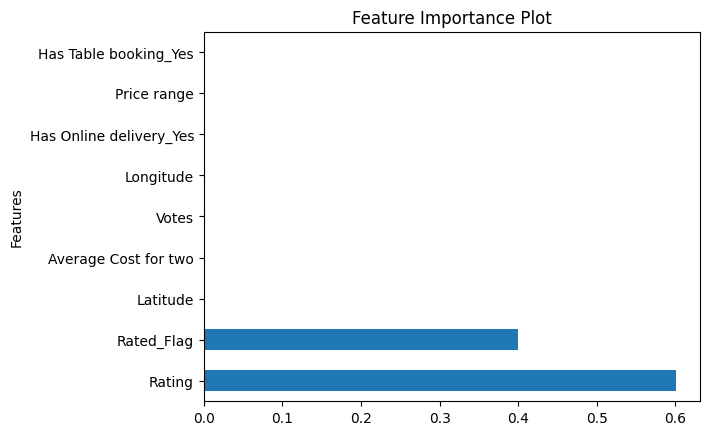

In [93]:
AdaBoostAlgo('ZomatoDF', 50, .2)